## More on SIR models

In [1]:
function updateSIR(popnvector)       # exactly the same function as before
    susceptibles = popnvector[1];
    infecteds    = popnvector[2]; 
    removeds     = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt  
    newR = removeds + gam*infecteds*dt
    return [newS newI newR] 
end

updateSIR (generic function with 1 method)

In [2]:
# likewise, a run of the model uses exactly the same code ... but we'll play a bit with the values that determine a run

gam = 1/20.         # recovery rate parameter  (ditto)
lambda = 0.0005     # infection rate parameter
dt = 0.5            # length of time step in days
tfinal = 610.;      # respecting community values: lowercase only in the names 
s0 = 2000.          # initial susceptibles, note that we use the  type Float64 from the start
i0 = 4.             # initial infecteds; set this to 1. to  mimic an epidemic with an index case
r0 = 0.             # not always the case, of course

# initialise 
nsteps = round(Int64, tfinal/dt)    # note the use of round() with type Int64 to ensure that nsteps is an integer
resultvals = Array{Float64}(undef, nsteps+1, 3)  #initialise array of type Float64 to hold results
timevec = Array{Float64}(undef, nsteps+1)        # ... ditto for time values
resultvals[1,:] = [s0, i0, r0]  # ... and assign them to the first row
timevec[1] = 0.                 # also Float64, of course.

for step  = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])  # NB! pay careful attention to the rows being used
    timevec[step+1] = timevec[step] + dt
end

In [3]:
using Plots
gr()

Plots.GRBackend()

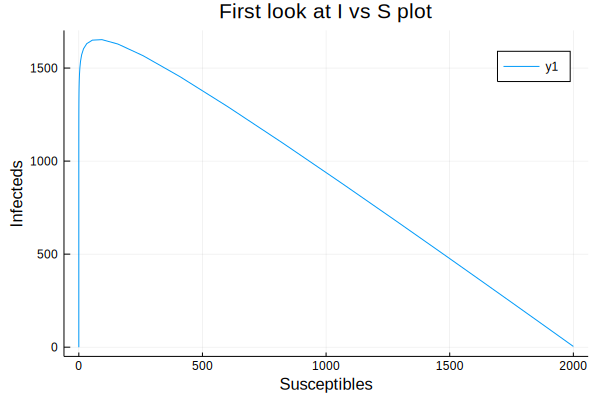

In [5]:
# now we can plot the outcome

svals = resultvals[:,1];
ivals = resultvals[:,2];

plot(svals, ivals,
    title = "First look at I vs S plot",
    xlabel = "Susceptibles",
    ylabel = "Infecteds"
)
